# HOUSING PRICE PREDICTIONS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import Dense
from mlxtend.regressor import StackingCVRegressor

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


## Data import

In [2]:
train = pd.read_csv(r"C:\Users\Shivam Singh Rajput\Desktop\train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
numeric_columns = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "PoolArea", "ScreenPorch", "3SsnPorch", "EnclosedPorch", "OpenPorchSF", "WoodDeckSF", "GarageArea", "TotRmsAbvGrd", "FullBath", "HalfBath"]# "Bedroom", "Kitchen"]

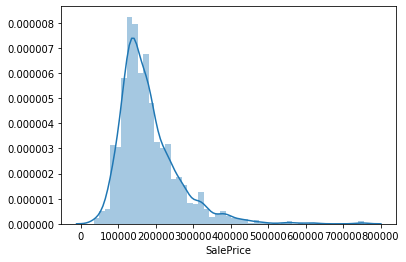

In [8]:
sns.distplot(train['SalePrice'])

In [9]:
train['SalePrice'].skew()

1.8828757597682129

In [10]:
train['SalePrice'].kurt()

6.536281860064529

The data is left skewed with appreciable skewness.  
To normalise it, we take log function on salePrice

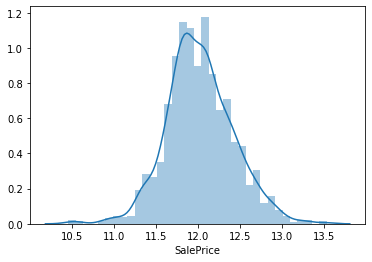

In [11]:
sns.distplot(np.log(train["SalePrice"]))

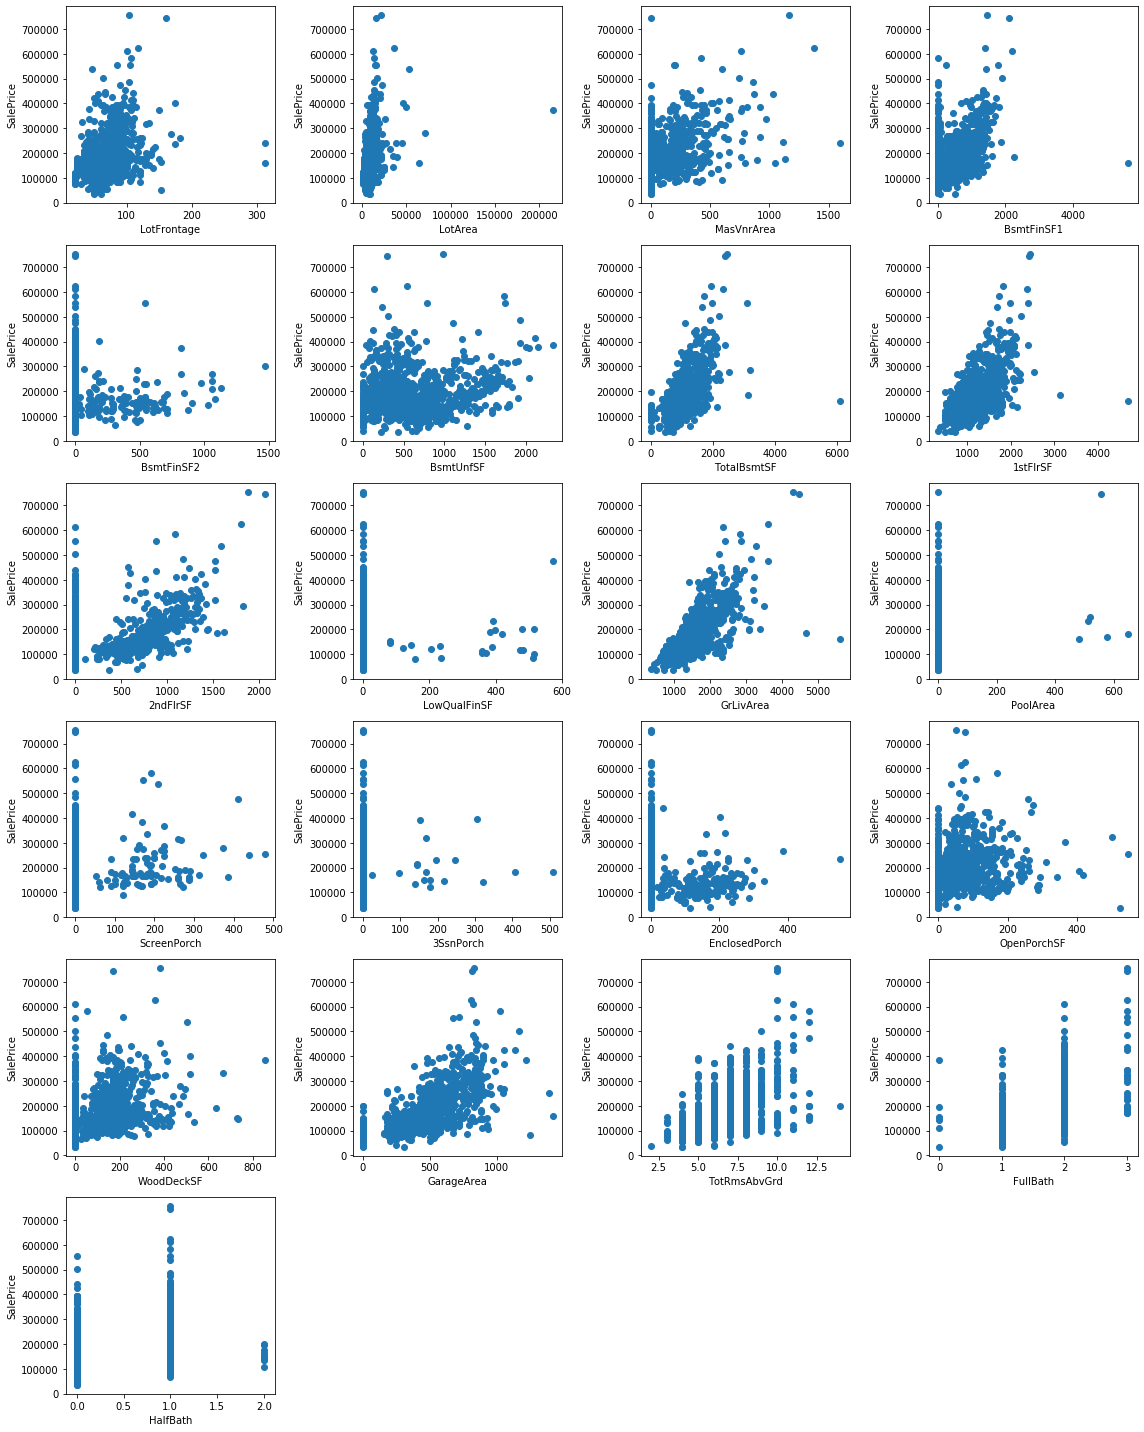

In [12]:
fig = plt.figure(figsize=(16,20))
i = 1
train1 = train[numeric_columns + ["SalePrice"]].dropna(axis=0)
train1.isnull().sum(axis=0)
for col in numeric_columns:
    plt.subplot(6,4, i)
    plt.scatter(train1[col], train1['SalePrice'])
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    i += 1
fig.tight_layout()

There are some outliers in the data. So outliers will be removed by setting threshold of 500000

In [13]:
train = train[train["SalePrice"]<500000]

In [14]:
train.shape

(1451, 81)

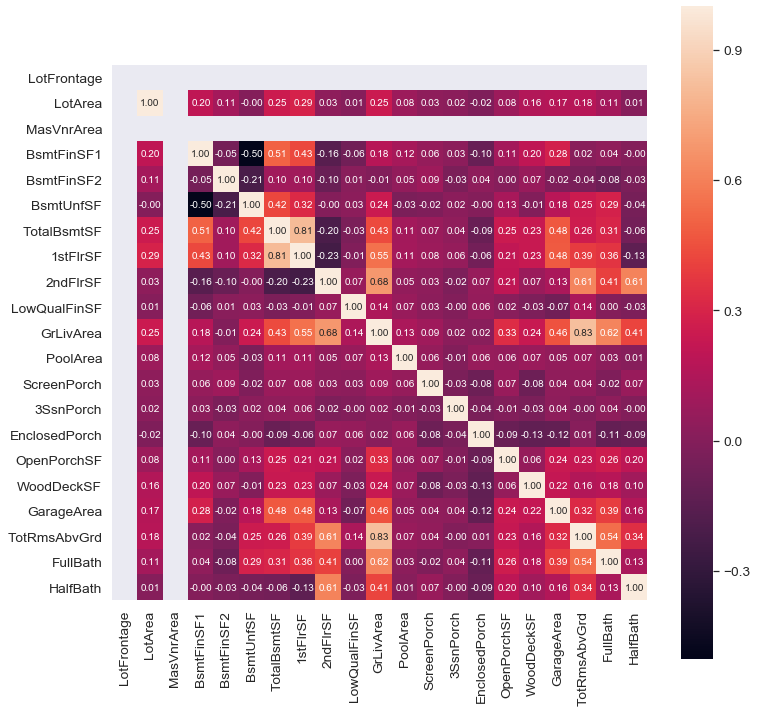

In [15]:
plt.figure(figsize=(12,12))
cm = np.corrcoef(train[numeric_columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=numeric_columns, xticklabels=numeric_columns)
plt.show()

In [16]:
cols = ["GrLivArea", "1stFlrSF", "TotalBsmtSF", "TotRmsAbvGrd", "SalePrice"]
train[cols].corr()

,GrLivArea,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,SalePrice
GrLivArea,1.000000,0.549128,0.431501,0.825282,0.686872
1stFlrSF,0.549128,1.000000,0.811904,0.389025,0.589676
TotalBsmtSF,0.431501,0.811904,1.000000,0.258892,0.596771
TotRmsAbvGrd,0.825282,0.389025,0.258892,1.000000,0.510964
SalePrice,0.686872,0.589676,0.596771,0.510964,1.000000


removing the columns with high corr with SalePrice

In [17]:
drop_cols = ["1stFlrSF", "TotRmsAbvGrd"]
train.drop(drop_cols,axis = 1, inplace = True)
numeric_columns = [i for i in numeric_columns if i not in drop_cols]

In [18]:
cat_cols = [i for i in train.columns if i not in numeric_columns + ["SalePrice"]]
train.index = train["Id"]
train.drop("Id",axis=1,inplace=True)
cat_cols = [i for i in cat_cols if not i == "Id"]

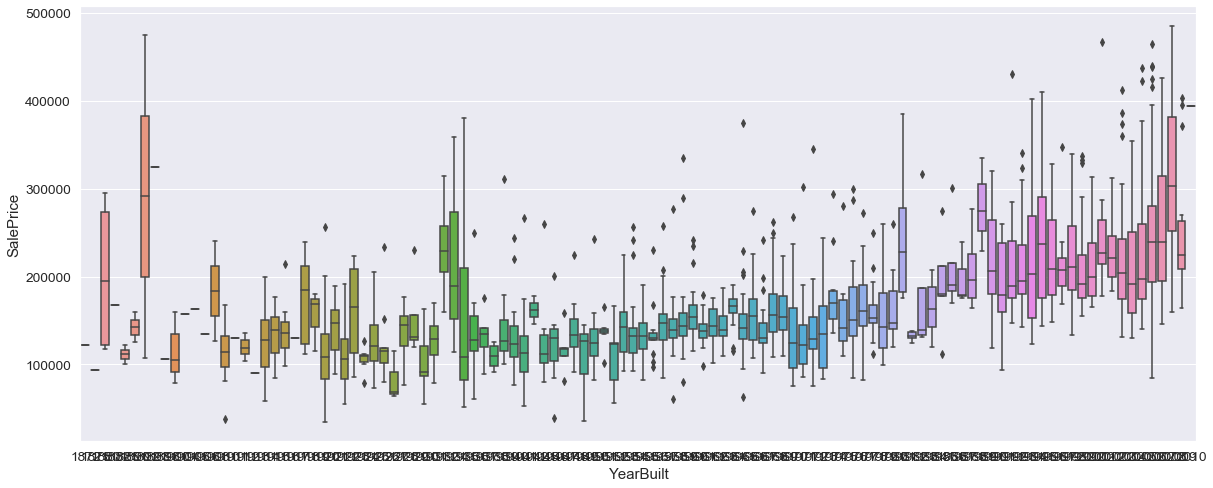

In [19]:
plt.figure(figsize=(20,8))
sns.boxplot(y="SalePrice",x="YearBuilt",data=train)

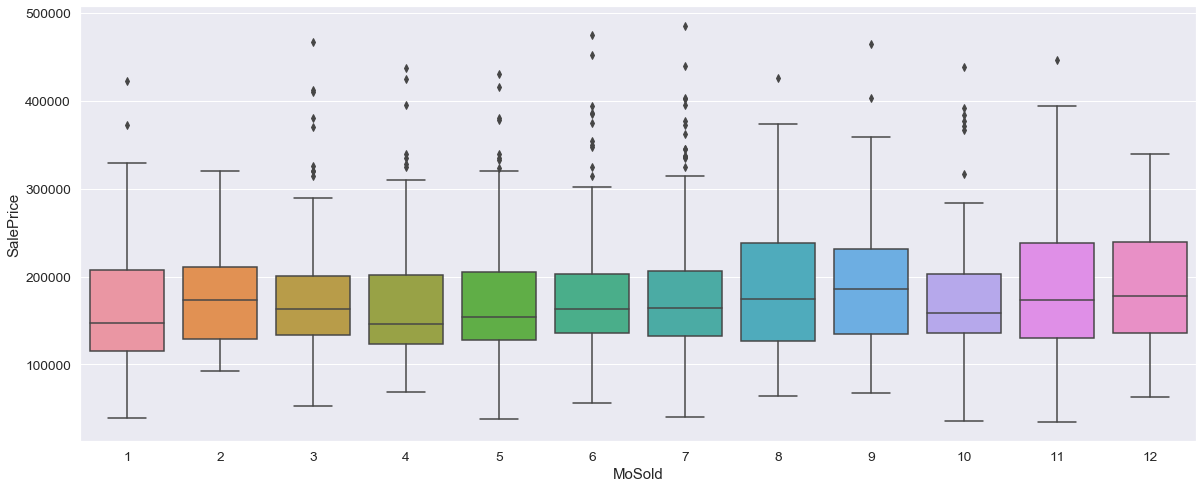

In [20]:
plt.figure(figsize=(20,8))
sns.boxplot(y="SalePrice",x="MoSold",data=train)

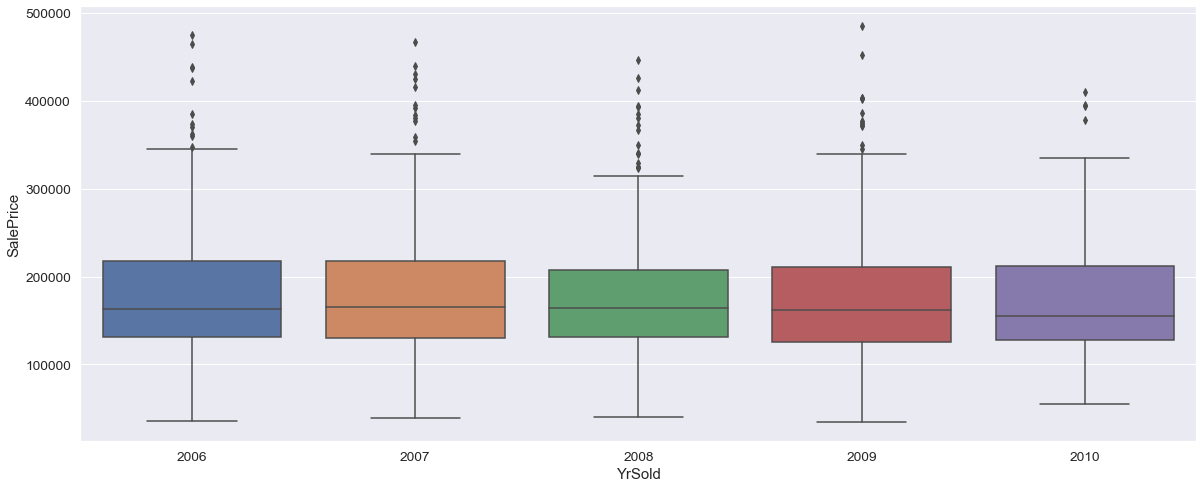

In [21]:
plt.figure(figsize=(20,8))
sns.boxplot(y="SalePrice",x="YrSold",data=train)

calculating the age of house

In [22]:
train["Age"] = train["YrSold"] - train["YearBuilt"]
numeric_columns.append("Age")
numeric_columns = list(set(numeric_columns))

In [23]:
numeric_columns

['MasVnrArea',
 'FullBath',
 'BsmtFinSF1',
 'HalfBath',
 'LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'ScreenPorch',
 'Age',
 'WoodDeckSF',
 'TotalBsmtSF',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LotArea',
 'EnclosedPorch',
 'OpenPorchSF',
 'LotFrontage',
 'GarageArea',
 'GrLivArea']

In [24]:
train.isnull().sum(axis=0).sort_values(ascending=False)

PoolQC           1445
MiscFeature      1397
Alley            1360
Fence            1171
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
LotConfig           0
LandSlope           0
MSZoning            0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodAdd        0
                 ... 
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Functional          0
BsmtUnfSF 

removing the columns with null values more than 15%

In [25]:
drop_columns = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]             
train.drop(drop_columns,axis=1,inplace=True)
numeric_columns = [i for i in numeric_columns if i not in drop_columns]
cat_cols = [i for i in cat_cols if i not in drop_columns]

removing the columns with high number of categories

In [26]:
drop_list = []
for i in cat_cols:
    if len(train[i].value_counts())>12:
        
        print("\n",i)
        print(len(train[i].value_counts()))
        drop_list.append(i)
drop_list


 MSSubClass
15

 Neighborhood
25

 YearBuilt
112

 YearRemodAdd
61

 Exterior1st
15

 Exterior2nd
16

 GarageYrBlt
97

 MiscVal
21


['MSSubClass',
 'Neighborhood',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'GarageYrBlt',
 'MiscVal']

In [27]:
train.drop(drop_list, axis = 1, inplace = True)
cat_cols = [i for i in cat_cols if not i in drop_list]

In [28]:
for col in numeric_columns:
    train[col].fillna(train[col].mean(),inplace=True)
for col in cat_cols:
    mode = train[col].value_counts().sort_values(ascending=False).index[0]
    train[col].fillna(mode,inplace=True)

In [29]:
train.isnull().sum(axis=0).sum(axis=0)

0

In [30]:
train[numeric_columns] = train[numeric_columns].astype(float)
train[cat_cols] = train[cat_cols].astype(object)
train_dummies = pd.get_dummies(train,drop_first=True)
train_dummies.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,854.0,0.0,1710.0,...,0,0,0,0,1,0,0,0,1,0
2,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,0.0,0.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
3,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,866.0,0.0,1786.0,...,0,0,0,0,1,0,0,0,1,0
4,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,756.0,0.0,1717.0,...,0,0,0,0,1,0,0,0,0,0
5,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1053.0,0.0,2198.0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
train_dummies.shape

(1451, 218)

In [32]:
scaler = StandardScaler()
train_scaled = train_dummies.copy()
train_scaled[numeric_columns] = scaler.fit_transform(train_dummies[numeric_columns])
train_scaled.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.221341,-0.201019,0.550982,0.599171,-0.288238,-0.944740,-0.452680,1.189859,-0.120619,0.403744,...,0,0,0,0,1,0,0,0,1,0
2,0.465619,-0.085012,-0.580145,1.206851,-0.288238,-0.640481,0.492965,-0.797681,-0.120619,-0.479873,...,0,0,0,0,1,0,0,0,1,0
3,-0.083949,0.081432,0.354766,0.107664,-0.288238,-0.299892,-0.303613,1.217787,-0.120619,0.553643,...,0,0,0,0,1,0,0,0,1,0
4,-0.450327,-0.090056,-0.580145,-0.495548,-0.288238,-0.059209,-0.685598,0.961781,-0.120619,0.417550,...,0,0,0,0,1,0,0,0,0,0
5,0.648808,0.385065,1.439724,0.485231,-0.288238,-0.172739,0.220451,1.652997,-0.120619,1.366256,...,0,0,0,0,1,0,0,0,1,0


In [33]:
X = train_scaled.drop(['SalePrice'], axis = 1)
y = train_scaled["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train_log = np.log(y_train)

PCA

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
pca = PCA()
pca_model = pca.fit(X_train)
pca.explained_variance_


array([5.46378872e+00, 2.66310884e+00, 2.03889427e+00, 1.72530297e+00,
       1.18594425e+00, 1.11561516e+00, 1.00179032e+00, 9.87335734e-01,
       9.69760434e-01, 9.20159748e-01, 8.53834666e-01, 7.89709881e-01,
       7.53836014e-01, 7.01900351e-01, 6.63269397e-01, 6.10435302e-01,
       5.53564817e-01, 4.86103383e-01, 3.83121027e-01, 3.67643263e-01,
       3.13809662e-01, 2.95675550e-01, 2.90201232e-01, 2.71668114e-01,
       2.60492746e-01, 2.46660338e-01, 2.36115178e-01, 2.23350250e-01,
       2.16652309e-01, 2.14222945e-01, 2.05683646e-01, 2.00897810e-01,
       1.93286969e-01, 1.89559260e-01, 1.79202090e-01, 1.72010575e-01,
       1.70095178e-01, 1.65805580e-01, 1.60714942e-01, 1.56249799e-01,
       1.47912372e-01, 1.45666324e-01, 1.40363650e-01, 1.37115742e-01,
       1.30480909e-01, 1.26655994e-01, 1.23217376e-01, 1.19082642e-01,
       1.16685120e-01, 1.09396232e-01, 1.06475796e-01, 1.05646528e-01,
       1.00628394e-01, 9.76766392e-02, 9.41923657e-02, 8.93878069e-02,
      

In [36]:
cum_var = np.cumsum(pca.explained_variance_)
cum_var

array([ 5.46378872,  8.12689757, 10.16579183, 11.8910948 , 13.07703905,
       14.19265421, 15.19444453, 16.18178026, 17.1515407 , 18.07170044,
       18.92553511, 19.71524499, 20.46908101, 21.17098136, 21.83425075,
       22.44468606, 22.99825087, 23.48435425, 23.86747528, 24.23511855,
       24.54892821, 24.84460376, 25.13480499, 25.4064731 , 25.66696585,
       25.91362619, 26.14974137, 26.37309162, 26.58974392, 26.80396687,
       27.00965052, 27.21054833, 27.4038353 , 27.59339456, 27.77259665,
       27.94460722, 28.1147024 , 28.28050798, 28.44122292, 28.59747272,
       28.74538509, 28.89105142, 29.03141507, 29.16853081, 29.29901172,
       29.42566771, 29.54888509, 29.66796773, 29.78465285, 29.89404908,
       30.00052488, 30.1061714 , 30.2067998 , 30.30447644, 30.3986688 ,
       30.48805661, 30.57563885, 30.66215048, 30.74478829, 30.82470607,
       30.90234223, 30.97647891, 31.04813357, 31.11821699, 31.18690145,
       31.25436331, 31.31760872, 31.37980543, 31.4401302 , 31.49

In [37]:
x_axis = np.array([range(0,218)]).reshape((218,))
y_axis = np.concatenate([np.array([0]), cum_var/cum_var[-1]], axis = 0)

In [38]:
cum_var

array([ 5.46378872,  8.12689757, 10.16579183, 11.8910948 , 13.07703905,
       14.19265421, 15.19444453, 16.18178026, 17.1515407 , 18.07170044,
       18.92553511, 19.71524499, 20.46908101, 21.17098136, 21.83425075,
       22.44468606, 22.99825087, 23.48435425, 23.86747528, 24.23511855,
       24.54892821, 24.84460376, 25.13480499, 25.4064731 , 25.66696585,
       25.91362619, 26.14974137, 26.37309162, 26.58974392, 26.80396687,
       27.00965052, 27.21054833, 27.4038353 , 27.59339456, 27.77259665,
       27.94460722, 28.1147024 , 28.28050798, 28.44122292, 28.59747272,
       28.74538509, 28.89105142, 29.03141507, 29.16853081, 29.29901172,
       29.42566771, 29.54888509, 29.66796773, 29.78465285, 29.89404908,
       30.00052488, 30.1061714 , 30.2067998 , 30.30447644, 30.3986688 ,
       30.48805661, 30.57563885, 30.66215048, 30.74478829, 30.82470607,
       30.90234223, 30.97647891, 31.04813357, 31.11821699, 31.18690145,
       31.25436331, 31.31760872, 31.37980543, 31.4401302 , 31.49

In [39]:
y_axis

array([0.        , 0.16395711, 0.24387155, 0.30505459, 0.3568274 ,
       0.39241516, 0.42589248, 0.45595416, 0.48558208, 0.51468261,
       0.54229472, 0.56791655, 0.59161412, 0.6142352 , 0.63529779,
       0.65520115, 0.67351906, 0.6901304 , 0.70471737, 0.71621405,
       0.72724627, 0.73666306, 0.74553567, 0.75424402, 0.76239622,
       0.77021308, 0.77761485, 0.78470018, 0.79140246, 0.79790376,
       0.80433215, 0.81050429, 0.81653282, 0.82233297, 0.82802126,
       0.83339874, 0.83856043, 0.84366464, 0.84864012, 0.85346285,
       0.85815158, 0.86259013, 0.86696128, 0.87117331, 0.87528787,
       0.87920333, 0.88300402, 0.88670152, 0.89027495, 0.89377643,
       0.89705919, 0.90025431, 0.90342454, 0.90644419, 0.90937527,
       0.91220179, 0.91488413, 0.9175123 , 0.92010834, 0.92258813,
       0.9249863 , 0.927316  , 0.92954069, 0.9316909 , 0.93379396,
       0.93585504, 0.93787943, 0.93977729, 0.94164369, 0.94345391,
       0.94517068, 0.94688273, 0.94854946, 0.95017521, 0.95171

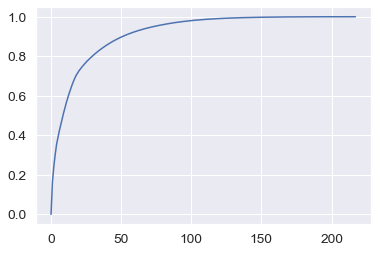

In [40]:
plt.plot(x_axis,y_axis)
plt.show()

we select 100 components

In [41]:
train_pca = pca.transform(X_train)
X_train_pca = train_pca[:,0:100]


In [42]:
test_pca = pca.transform(X_test)
X_test_pca = test_pca[:,0:100]

Linear regression

In [43]:
lin_reg = LinearRegression(n_jobs = 2)
lin_reg.fit(X_train,y_train_log)
y_pred = np.exp(lin_reg.predict(X_test).astype(int)).astype(int)
np.sqrt(mean_squared_error(y_test,y_pred))

252056990.9512047

linear regression with pca

In [44]:
lin_reg = LinearRegression(n_jobs = 2)
lin_reg.fit(X_train_pca,y_train_log)
y_pred = np.exp(lin_reg.predict(X_test_pca).astype(int)).astype(int)
np.sqrt(mean_squared_error(y_test,y_pred))

83028.22250779797

regularization

In [45]:
y_pred

array([162754, 162754, 162754, 162754, 162754, 162754,  59874,  59874,
        59874, 162754, 162754, 162754, 162754, 162754,  59874, 162754,
       162754, 162754,  59874, 162754,  59874, 162754, 162754,  59874,
        59874, 162754,  59874,  59874, 162754,  59874, 162754,  59874,
        59874, 162754,  59874,  59874, 162754, 162754,  59874, 162754,
       162754,  59874, 162754,  59874,  59874,  59874,  59874, 162754,
       162754,  59874,  59874, 162754, 162754,  59874, 162754,  59874,
       162754,  59874, 162754,  59874, 162754, 162754,  59874, 162754,
       162754,  59874,  59874, 162754,  59874, 162754, 162754,  59874,
       162754, 162754,  59874, 162754, 162754, 162754,  59874,  59874,
        59874,  59874, 162754, 162754,  59874, 162754, 162754,  59874,
       162754, 162754,  59874,  59874, 162754,  59874, 162754, 162754,
       162754, 162754, 162754,  59874,  59874,  59874,  59874, 162754,
        59874,  59874, 162754,  59874, 162754, 162754,  59874,  59874,
      

In [46]:
lasso = Lasso(alpha=0.000001)
lasso.fit(X_train,y_train_log)
y_pred = np.exp(lasso.predict(X_test).astype(int))
np.sqrt(mean_squared_error(y_test,y_pred))

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2222593219309905, tolerance: 0.01646041611513148
  positive)


82596.7966747206

In [47]:
lasso.coef_

array([ 8.78156882e-03,  3.18097569e-02,  4.81668227e-03,  4.06773588e-02,
        2.99559517e-02,  1.80952446e-02,  1.30916150e-02, -1.35742660e-02,
       -4.54672089e-03,  1.43022498e-01,  5.23995745e-03,  6.30171404e-03,
        2.00072818e-02,  1.00587205e-02, -2.13420338e-04,  9.25765645e-03,
        6.76562351e-03,  1.06362603e-02, -6.19402928e-04, -4.94622624e-02,
        4.81215566e-01,  5.49078288e-01,  4.42638269e-01,  3.71965320e-01,
        5.65455327e-02, -4.00283686e-03,  5.09069100e-02, -2.05511569e-03,
        6.50680197e-02,  2.37167777e-02,  3.52892502e-02, -1.58498518e-01,
        3.14273612e-02, -2.27733096e-02, -3.72858773e-02, -5.65074221e-03,
        6.69306115e-02, -3.50612434e-01,  5.64541874e-02,  1.13699110e-01,
        1.05126046e-01,  1.14816448e-01,  4.91548061e-02,  1.02881606e-01,
        8.81165200e-02,  9.66477483e-02,  8.82374726e-02,  6.95149995e-02,
        1.56669719e-01, -8.62361358e-01,  0.00000000e+00, -2.36122217e-02,
        4.23575416e-02, -

In [48]:
ridge = Ridge(alpha= 0.00001)
ridge.fit(X_train,y_train_log)
y_pred = np.exp(ridge.predict(X_test).astype(int))
np.sqrt(mean_squared_error(y_test,y_pred))

82596.7966747206

In [49]:
ridge.coef_

array([ 8.80096125e-03,  3.19090148e-02,  4.75792073e-03,  2.21315850e-02,
        2.31743563e-02, -2.46047386e-04,  3.15224239e-02, -1.31689840e-02,
       -4.76742157e-03,  1.42181208e-01,  5.58996954e-03,  6.27177713e-03,
        2.01161045e-02,  1.00398144e-02, -1.19973975e-04,  9.15729346e-03,
        6.75826745e-03,  1.05397510e-02, -5.68661853e-04, -4.93799991e-02,
        4.83858885e-01,  5.49699803e-01,  4.45775661e-01,  3.74632311e-01,
        5.97727795e-02, -5.08395992e-03,  5.07816332e-02, -1.75555995e-03,
        6.57751998e-02,  2.97572881e-02,  3.59895996e-02, -1.64073920e-01,
        3.15357721e-02, -2.20902884e-02, -3.59752151e-02, -5.59008769e-03,
        6.84397765e-02, -3.55122348e-01,  5.77517859e-02,  1.15274589e-01,
        1.09062772e-01,  1.17094912e-01,  4.95620192e-02,  1.03964255e-01,
        9.07902543e-02,  9.70968632e-02,  8.24047626e-02,  6.34788829e-02,
        2.17285818e-01, -8.69317388e-01,  0.00000000e+00, -3.22744885e-02,
        3.27579693e-02, -

cross validation in decision tree

In [50]:
param_grid = {} 
param_grid["max_depth"] = [7,9,11]
param_grid["max_features"] = [80,90,100]
param_grid["min_samples_split"] = [2,3]
d_tree_reg = DecisionTreeRegressor()
model_DT = GridSearchCV(estimator = d_tree_reg,param_grid = param_grid, n_jobs = 3,verbose=1,cv=5)
model_DT.fit(X_train,y_train_log)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  67 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:    4.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=3,
             param_grid={'max_depth': [7, 9, 11], 'max_features': [80, 90, 100],
                         'min_samples_split': [2, 3]},
             pre_dispa

In [51]:
model_DT.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=90, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [52]:
y_pred = np.exp(model_DT.predict(X_test))
np.sqrt(mean_squared_error(y_test,y_pred))

35758.541374696804

cross validation in Random forest

In [53]:
rf_reg = RandomForestRegressor()
model_rf = GridSearchCV(estimator = rf_reg,param_grid = param_grid, n_jobs = 3,verbose=1,cv=5)
params_dict ={"n_estimators": [50,100,150],
              "max_depth": [5,7,9],
              "min_samples_split": [1.0,2,3],"max_depth": [3,4,5]}
model_rf.fit(X_train,y_train_log)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.3s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:   34.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [54]:
model_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features=80, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
y_pred = np.exp(model_rf.predict(X_test))
np.sqrt(mean_squared_error(y_test,y_pred))

25227.625345366014

In [56]:
from keras.layers import Dropout

In [57]:
model = Sequential()
model.add(Dense(64, input_dim= X_train.shape[1], activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train,y_train_log, epochs = 200, batch_size = 32)

Epoch 1/200
1088/1088 [==============================] - 2s 1ms/step - loss: 70.1634 - mse: 70.1634
Epoch 2/200
1088/1088 [==============================] - 0s 59us/step - loss: 1.9325 - mse: 1.9325
Epoch 3/200
1088/1088 [==============================] - 0s 81us/step - loss: 0.6622 - mse: 0.6622
Epoch 4/200
1088/1088 [==============================] - 0s 74us/step - loss: 0.4757 - mse: 0.4757
Epoch 5/200
1088/1088 [==============================] - 0s 74us/step - loss: 0.3895 - mse: 0.3895
Epoch 6/200
1088/1088 [==============================] - 0s 88us/step - loss: 0.3299 - mse: 0.3299
Epoch 7/200
1088/1088 [==============================] - 0s 74us/step - loss: 0.2886 - mse: 0.2886
Epoch 8/200
1088/1088 [==============================] - 0s 62us/step - loss: 0.2520 - mse: 0.2520
Epoch 9/200
1088/1088 [==============================] - 0s 62us/step - loss: 0.2252 - mse: 0.2252
Epoch 10/200
1088/1088 [==============================] - 0s 77us/step - loss: 0.2009 - mse: 0.2009
Epoch 11

Epoch 83/200
1088/1088 [==============================] - 0s 66us/step - loss: 0.0128 - mse: 0.0128
Epoch 84/200
1088/1088 [==============================] - 0s 62us/step - loss: 0.0127 - mse: 0.0127
Epoch 85/200
1088/1088 [==============================] - 0s 62us/step - loss: 0.0127 - mse: 0.0127
Epoch 86/200
1088/1088 [==============================] - 0s 70us/step - loss: 0.0142 - mse: 0.0142
Epoch 87/200
1088/1088 [==============================] - 0s 55us/step - loss: 0.0147 - mse: 0.0147
Epoch 88/200
1088/1088 [==============================] - 0s 59us/step - loss: 0.0116 - mse: 0.0116
Epoch 89/200
1088/1088 [==============================] - 0s 59us/step - loss: 0.0113 - mse: 0.0113
Epoch 90/200
1088/1088 [==============================] - 0s 55us/step - loss: 0.0114 - mse: 0.0114
Epoch 91/200
1088/1088 [==============================] - 0s 66us/step - loss: 0.0115 - mse: 0.0115
Epoch 92/200
1088/1088 [==============================] - 0s 59us/step - loss: 0.0136 - mse: 0.0136


1088/1088 [==============================] - 0s 66us/step - loss: 0.0031 - mse: 0.0031
Epoch 164/200
1088/1088 [==============================] - 0s 70us/step - loss: 0.0033 - mse: 0.0033
Epoch 165/200
1088/1088 [==============================] - 0s 66us/step - loss: 0.0031 - mse: 0.0031
Epoch 166/200
1088/1088 [==============================] - 0s 70us/step - loss: 0.0029 - mse: 0.0029
Epoch 167/200
1088/1088 [==============================] - 0s 70us/step - loss: 0.0028 - mse: 0.0028
Epoch 168/200
1088/1088 [==============================] - 0s 62us/step - loss: 0.0030 - mse: 0.0030  
Epoch 169/200
1088/1088 [==============================] - 0s 62us/step - loss: 0.0030 - mse: 0.0030
Epoch 170/200
1088/1088 [==============================] - 0s 62us/step - loss: 0.0033 - mse: 0.0033
Epoch 171/200
1088/1088 [==============================] - 0s 59us/step - loss: 0.0042 - mse: 0.0042
Epoch 172/200
1088/1088 [==============================] - 0s 59us/step - loss: 0.0054 - mse: 0.0054
Ep

In [58]:
y_pred = np.exp(model.predict(X_test))
np.sqrt(mean_squared_error(y_test,y_pred))

49874.68905844663

cross validation for gradient boosting

In [59]:
params_dict ={"learning_rate": [0.05,0.1,0.2],
              "n_estimators": [50,100,150],
              "subsample": [0.7, 0.75, 0.8], 
              "min_samples_split": [1.0,2,3],"max_depth": [3,4,5]}
gbm_reg = GradientBoostingRegressor()
model_gbm = GridSearchCV(estimator = gbm_reg,param_grid = params_dict, n_jobs = 3,verbose=1,cv=5)
model_gbm.fit(X_train,y_train_log)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 103 tasks      | elapsed:   16.9s
[Parallel(n_jobs=3)]: Done 253 tasks      | elapsed:   58.9s
[Parallel(n_jobs=3)]: Done 503 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 853 tasks      | elapsed:  3.8min
[Parallel(n_jobs=3)]: Done 1215 out of 1215 | elapsed:  5.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [60]:
y_pred = np.exp(model_gbm.predict(X_test))
np.sqrt(mean_squared_error(y_test,y_pred))

23811.678405087194

Stacking

In [61]:
d_tree = DecisionTreeRegressor()
ran_for = RandomForestRegressor()
lasso = Lasso()
gbm = GradientBoostingRegressor()

regressor_list = [d_tree,lin_reg,lasso,gbm]
lin_reg = LinearRegression()
stacking_reg = StackingCVRegressor(regressor_list,ran_for, random_state= 3)
stacking_reg.fit(X_train,y_train_log)

StackingCVRegressor(cv=5,
                    meta_regressor=RandomForestRegressor(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         criterion='mse',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                           

In [62]:
y_pred = np.exp(stacking_reg.predict(X_test))
np.sqrt(mean_squared_error(y_test,y_pred))

22260.403258035443

In [69]:
d_tree = DecisionTreeRegressor()
ran_for = RandomForestRegressor()
lasso = Lasso()
gbm = GradientBoostingRegressor()

regressor_list = [d_tree,lin_reg,lasso,ran_for]
lin_reg = LinearRegression()
stacking_reg = StackingCVRegressor(regressor_list,gbm, random_state= 3)
stacking_reg.fit(X_train,y_train_log)

StackingCVRegressor(cv=5,
                    meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                             ccp_alpha=0.0,
                                                             criterion='friedman_mse',
                                                             init=None,
                                                             learning_rate=0.1,
                                                             loss='ls',
                                                             max_depth=3,
                                                             max_features=None,
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                        

In [70]:
y_pred = np.exp(stacking_reg.predict(X_test))
np.sqrt(mean_squared_error(y_test,y_pred))

21302.08928893165